# k-최근접 이웃 회귀

## 농어의 무게를 예측하라
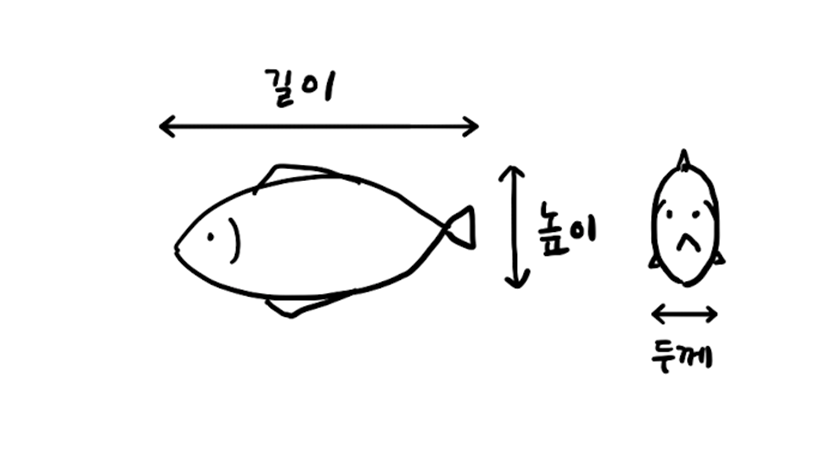

### 지도 학습 VS 비지도 학습
- 학습을 위한 데이터에 결정값이 있는지의 여부(정답이 있느냐 없느냐)

#### 지도학습
- 회귀 와 분류
    - 분류 : 샘플을 몇개의 클래스(범주)로 분류하는 문제
    - 회귀 : 임의의 어떤 숫자를 예측하는 문제
        - 통계적인 의미의 회귀 : 두 변수 사이의 상관관계를 분석하는 방법

## k-최근접 이웃 알고리즘
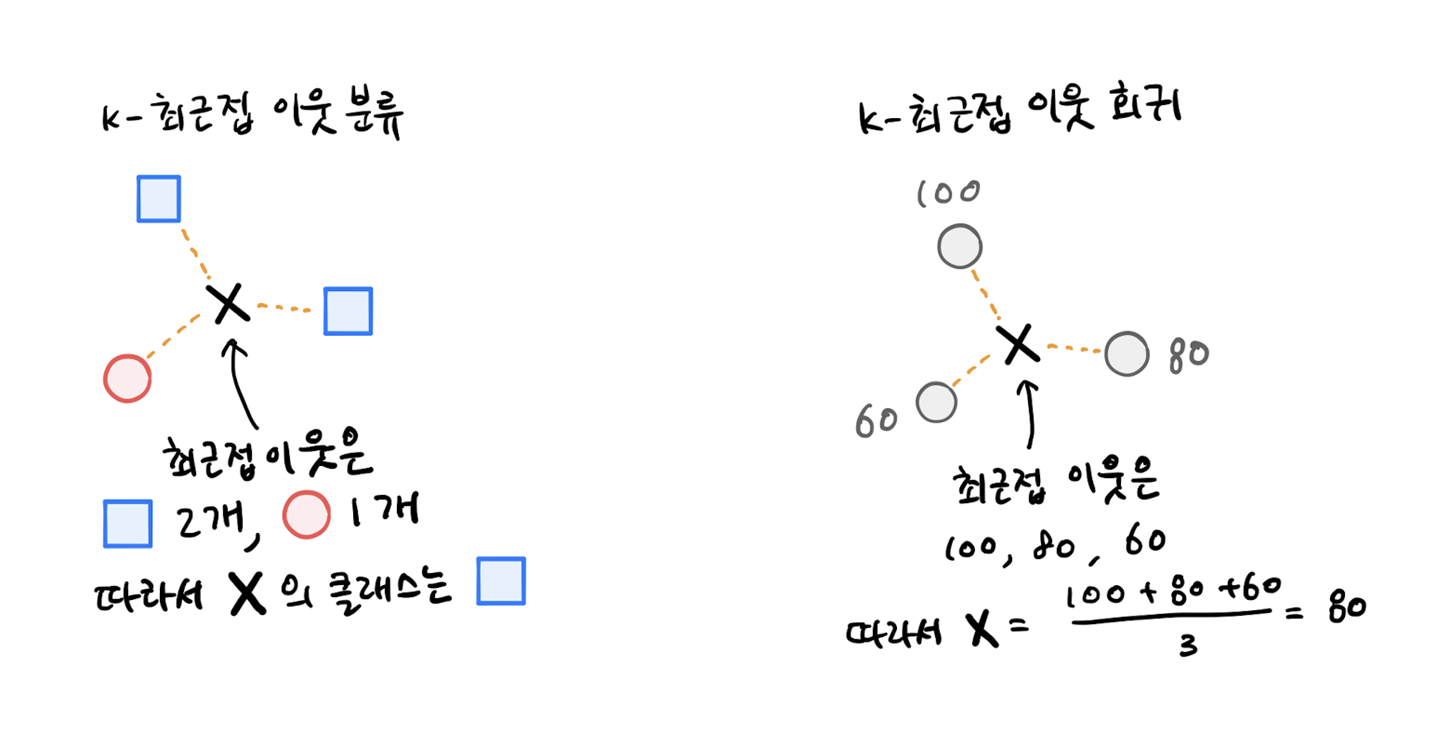

## 데이터 준비

In [1]:
import numpy as np

In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

- 데이터 형태 및 특성 확인

In [4]:
import matplotlib.pyplot as plt

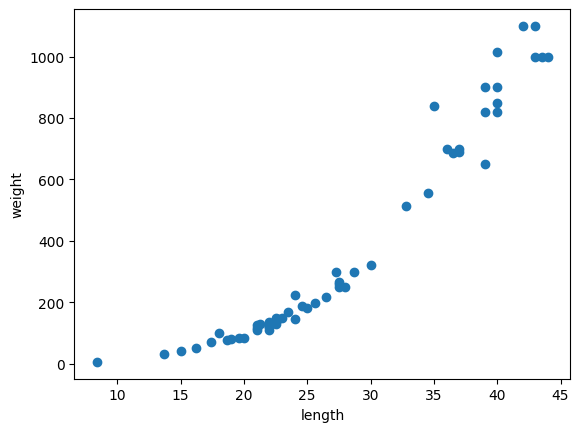

In [5]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 농어의 길이가 길어짐에 따라 무게도 늘어남
    - 농어 길이 특성을 이용해 무게를 예측하자...

- 데이터 분할

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

In [8]:
print(train_input.shape, test_input.shape)

(42,) (14,)


- 학습 데이터가 1차원임
    - 사이킷런은 2차원 입력을 요구하므로 차원을 변경해야 함
    - 넘파이 배열.reshape(행,열[,깊이]) 함수 사용

In [10]:
# shape 속성 - 튜플 구조를 반환
test_array = np.array([1,2,3,4])
test_array.shape[0]

4

In [12]:
# reshape() : 데이터의 차원을 변경하는 함수
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [14]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [15]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [9]:
# reshape() :  데이터의 차원을 변경하는 함수


(2, 2)


In [10]:
# 행렬로 변경했을 때 나타나는 원소수가 원본과 일치해야 함
# 2행3열은 6개의 원소, 원본은 4개 원소
# test_array = test_array.reshape(2, 3)

- input 데이터 차원 변경 : 행에 -1을 사용하면 행은 알아서 계산
    - 행은알아서계산, 1열 의 2차원 데이터로 변환됨

In [12]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)
- 회귀 모델의 예측 결과에 대한 평가지표
- 회귀에서 정확한 숫자(정확한 무게)를 맞춘다는 것은 불가능 함
    - 예측값이나 타깃값 모두 임의의 숫자임
    - Ex. A지역의 B 아파트 25평의 가격을 생각해보면
        - 해당 가격은 그 아파트가 매매가 이루어질때 결정됨
        - 동일한 날 동일한 부동산에서 거래가 이루어져도 다른 가격에 거래가 이루어 질 수 있음
        - 그러므로 부동산 가격은 절대적인 가격이 아닌 임의의 값으로 봐야 함
    - 결국 회귀의 평가는
        - 모든 타겟에 대해서 타깃값에서 예측값을 뺀 크기가 얼마나 되는지를 확인해서 계산 하게됨
        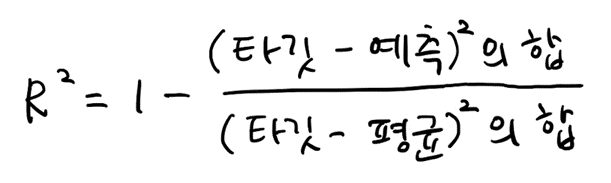

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [19]:
knr.score(test_input, test_target) # 회귀모델(KNN)의 기본 평가지표는 R2값

0.992809406101064

- $ R^2$ 지표로 0.99가 나옴
    - 상당히 좋은 값 이지만 직관적이지 못함
    - 직관적인 다른 지표를 사용
        - MAE : 타깃값과 예측값의 절대값 오차의 평균

- 30:35 -> 5, 40:38 -> 2
- mae : (5+2)/2

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
# 테스트 세트에 대한 예측을 만듭니다
test_pred = knr.predict(test_input)


# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_pred)
mae

19.157142857142862

- 결과적으로 평균 19g정도 타깃값과 다르다는 의미

## 과대적합 vs 과소적합

In [22]:
print(knr.score(test_input, test_target))

0.992809406101064


In [23]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 훈련 세트의 score보다 테스트 세트의 score가 더 높다
    - 과소 적합

In [24]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [25]:
print(knr.score(test_input, test_target))

0.9746459963987609


- 훈련 세트의 score가 테스트 세트의 score보다 더 높다
    - 과대 적합

- 차이가 미비한건 상관이 없음(실제 작은 차이는 과대/과소 적합이라고도 하지 않음)
    - 차이가 너무 많이 나면
        - 훈련을 너무 많이 시켜 훈련데이터에만 맞는 모델이 되었거나(과대적합)
            - 과대적합은 훈련스코어는 높으나, 테스트 스코어는 현저하게 낮은 경우
        - 훈련을 너무 적게 해서 제대로 된 결과를 내지 못하고 있는 것(과소적합)
            - 과소 적합은 성능이 굉장히 떨어진 결과로 나타남

## 과대/과소 적합 확인 예제
- n_neighbors 값을 변경시켜가면서 그래프를 통해 과대,과소 적합 확인

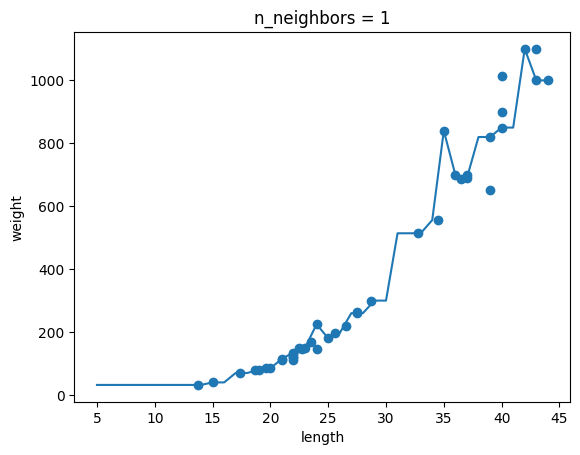

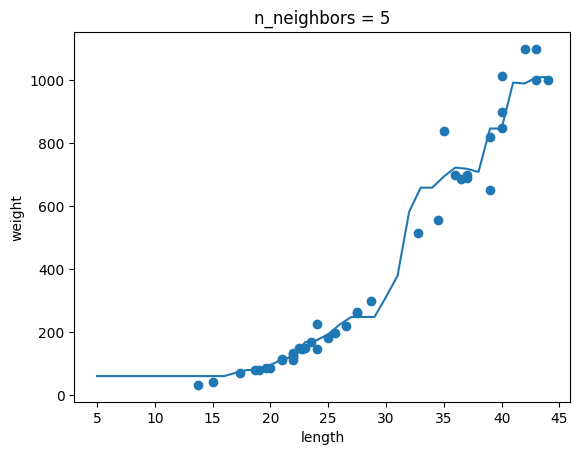

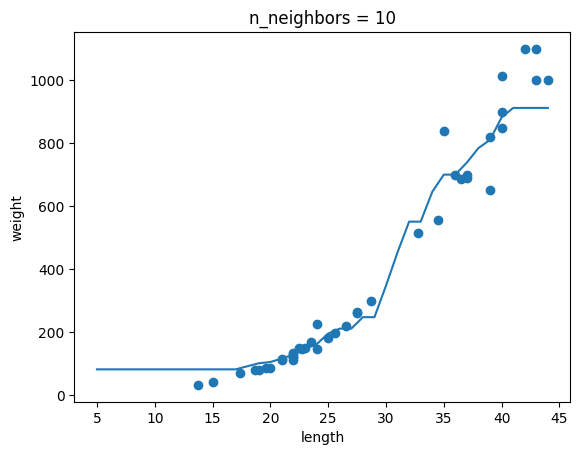

In [27]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만듭니다
x= np.arange(5,45).reshape(-1,1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    # 훈련세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()